In [1]:


%run ./scripts/setup.py


# <center>Research in Ultrasound Imaging  </center> 
<br>


## <center>Detail of Some Approaches </center>




<center>Fintan J. McEvoy</center>

<br><br><br><br>
<center><font color=brown>University of Copenhagen</font></center>


Ultrasonographic predictors of response of European eels (Anguilla anguilla) to hormonal treatment for induction of ovarian development<br>
Anna V. Müller, Fintan J. McEvoy, Jonna Tomkiewicz, Sebastian N. Politis, \& José M. Amigo<br>
American Journal of Veterinary Research, https://doi.org/10.2460/ajvr.77.5.478<br><br><br>

Fingerprinting of Doppler audio signals from the common carotid artery<br>
Anna V. Müller, José M. Amigo, Nicoline R. Wichmann1, Frederik B. Witschas \& Fintan J. McEvoy<br>
Scientific Reports, https://doi.org/10.1038/s41598-020-59274-y

In [2]:
image1 = cv2.imread(home+"/images/eel.png")
cv2.imshow('Abstract', image1); cv2.waitKey(0); cv2.waitKey(1)


image2 = cv2.imread(home+"/images/eel_us.jpg")
cv2.imshow('Ovary ultrasound', image2); cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)

-1

## Looking for texture differences

### Using the grey co matrix

In [3]:
image = cv2.imread(home+"/images/GCM.png")
cv2.imshow('greycomatrix', image); cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)

-1

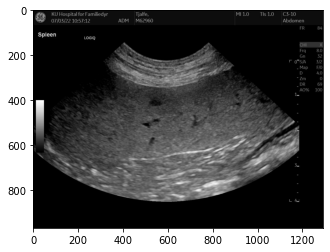

(970, 1292)

In [4]:
#Get image data as an array
img = Image.open(home+'/images/spleen_us.jpg')
gray_image=img.convert('L')
gray_image_array=np.asarray(gray_image)
plt.imshow(gray_image_array,cmap='gray', vmin = 0, vmax = 255)
plt.show()
global image_grey
image_grey = gray_image_array
image_grey.shape

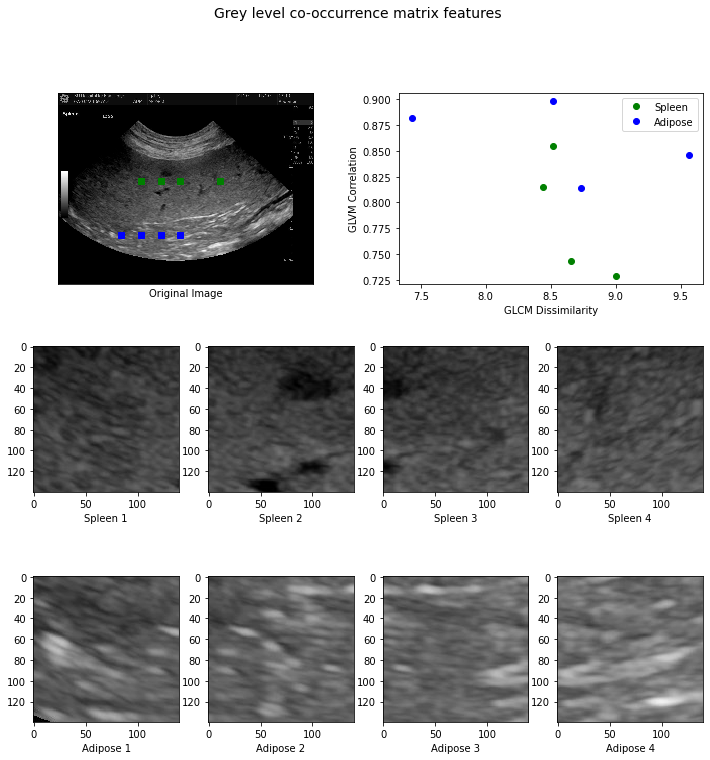

In [5]:
spleenTexture(image_grey)

In [6]:
GCM()
df=GCM()
df


,ASM,contrast,energy,dissimilarity,correlation,homogeneity
spleen_1,0.000558,118.729630,0.023628,8.658307,0.743677,0.108868
spleen_2,0.000475,120.110317,0.021790,8.519418,0.854900,0.115629
spleen_3,0.000514,111.622751,0.022671,8.439683,0.815288,0.110281
spleen_4,0.000521,132.102646,0.022831,9.003492,0.728924,0.107575
adipose_1,0.000457,188.491852,0.021388,9.564233,0.845892,0.118905
adipose_2,0.000585,142.842857,0.024181,8.734497,0.814367,0.123020
adipose_3,0.000698,93.902487,0.026423,7.434550,0.882034,0.133009
adipose_4,0.000425,123.147619,0.020623,8.519365,0.898065,0.120813


In [7]:
df_norm=DataNorm()
df_norm

,ASM,contrast,energy,dissimilarity,correlation,homogeneity,label
spleen_1,0.487365,0.262473,0.518143,0.574619,0.087219,0.050857,spleen
spleen_2,0.181277,0.277070,0.201081,0.509403,0.744798,0.316689,spleen
spleen_3,0.324823,0.187339,0.352977,0.471963,0.510599,0.106415,spleen
spleen_4,0.351622,0.403853,0.380686,0.736702,0.000000,0.000000,spleen
adipose_1,0.117758,1.000000,0.131871,1.000000,0.691540,0.445476,adipose
adipose_2,0.584264,0.517398,0.613496,0.610395,0.505156,0.607277,adipose
adipose_3,1.000000,0.000000,1.000000,0.000000,0.905222,1.000000,adipose
adipose_4,0.000000,0.309180,0.000000,0.509379,1.000000,0.520492,adipose


In [8]:
df_norm.describe()

,ASM,contrast,energy,dissimilarity,correlation,homogeneity
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.380889,0.369664,0.399782,0.551558,0.555567,0.380901
std,0.314905,0.296150,0.314775,0.281191,0.359890,0.336296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.165397,0.243689,0.183778,0.500025,0.400671,0.092525
50%,0.338222,0.293125,0.366831,0.542011,0.601070,0.381083
75%,0.511590,0.432239,0.541981,0.641972,0.784904,0.542189
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Run the PCA
x=df.values
pca_texture = PCA(n_components=2)
principalComponents_texture = pca_texture.fit_transform(x)

#Create a dataframe of components
global principal_texture_Df
principal_texture_Df = pd.DataFrame(data = principalComponents_texture ,
                                    columns = ['principal component 1', 'principal component 2']
                                    , index=['spleen_1','spleen_2','spleen_3','spleen_4','adipose_1','adipose_2','adipose_3','adipose_4'])

In [10]:
principal_texture_Df

,principal component 1,principal component 2
spleen_1,-10.136346,-0.252422
spleen_2,-8.758577,-0.071432
spleen_3,-17.246113,-0.159202
spleen_4,3.240823,-0.343338
adipose_1,59.630447,0.185146
adipose_2,13.973936,0.138544
adipose_3,-34.982335,0.509804
adipose_4,-5.721836,-0.007099


<Figure size 432x288 with 0 Axes>

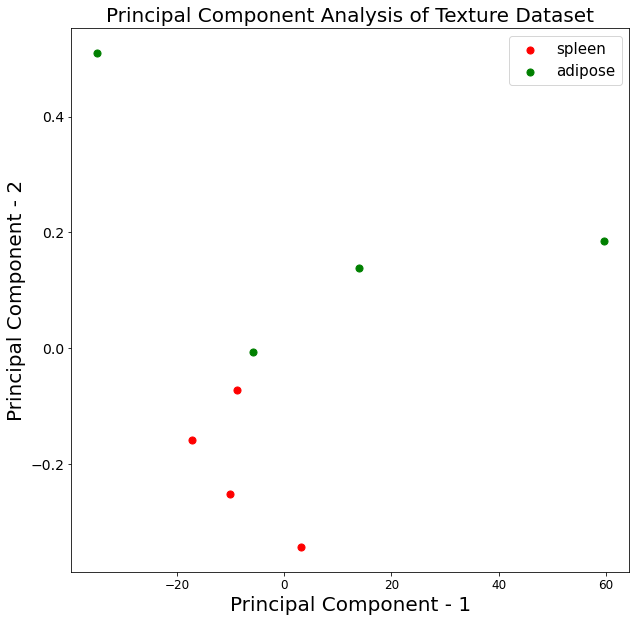

In [11]:
PlotPCA(principal_texture_Df, df_norm)

In [12]:
print('Explained variation per principal component: {}'.format(pca_texture.explained_variance_ratio_))

Explained variation per principal component: [9.99902058e-01 9.56181709e-05]


In [13]:
array_loadings=(abs( pca_texture.components_ ))
df_pca_loadings = pd.DataFrame(pca_texture.components_)
df_loadings = pd.DataFrame(array_loadings, 
                  index = ['PC1', 'PC2'], 
                  columns = ['ASM', 'contrast','energy','dissimilarity', 'correlation', 'homogeneity'])
df_loadings

,ASM,contrast,energy,dissimilarity,correlation,homogeneity
PC1,0.000002,0.999818,0.000032,0.019071,0.000163,0.000037
PC2,0.000158,0.018845,0.003169,0.986536,0.159623,0.030025


### <center>oooOooo</center>

In [14]:
image10 = cv2.imread(home+"/images/fingerPrinting.png")
cv2.imshow('Abstract', image10); cv2.waitKey(0);  cv2.waitKey(1)


image11 = cv2.imread(home+"/images/spectra_fig.jpg")
cv2.imshow('Time and Frequency Domains', image11); cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(2)

-1

In [15]:
ShowVideo(home+'/images/chaplin.mp4')

In [ ]:
!pip install pydub

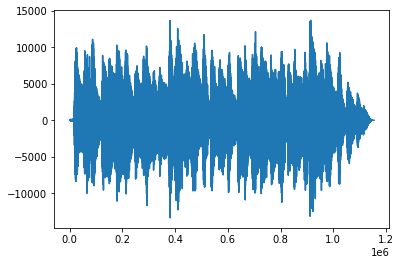

In [16]:
plot_PowerSpectrum(home+"/images/cross.mp3")

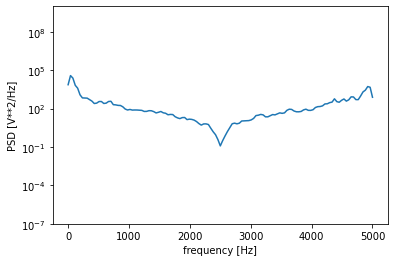

In [17]:
pcm16_signed_integers=PowerSpectrum(home+"/images/cross.mp3")
fs = 10e3
f, Pxx_den = signal.welch(pcm16_signed_integers, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e10])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

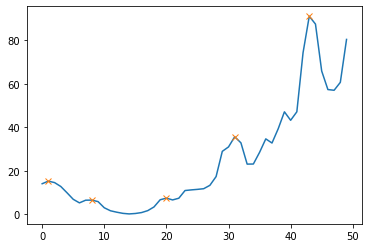

In [18]:
#Find peaks from scipy.signal "find_peaks"
x=Pxx_den[50:100]
peaks, _ = find_peaks(x, height=0)
peaks, properties=find_peaks(x, height=0, width=1)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()


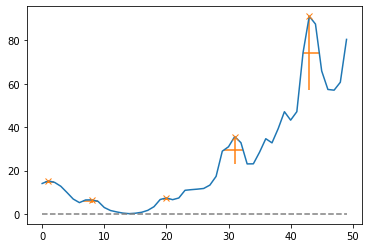

In [19]:

plt.plot(x)

plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],

           xmax=properties["right_ips"], color = "C1")
plt.show()


In [20]:
properties["prominences"], properties["widths"]


(array([ 1.18352026,  1.27179924,  0.82032185, 12.59845748, 34.0730216 ]),
 array([1.38281783, 2.39371425, 1.0545608 , 3.14706042, 2.63059552]))

### <center>oooOooo</center>

# <center>Ultrasound Image analysis and  statistics </center> 
<br>

<center>using</center>


## <center>Python</center>


## <center>Principal Component Analsyis</center>

<br>

<center>Fintan J. McEvoy</center>

<br><br><br><br>
<center><font color=brown>University of Copenhagen</font></center>

In [21]:


%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p os,wget,pandas,skimage,sklearn,scipy,numpy,matplotlib,cv2,pydub,watermark 

# date
print (" ")
%watermark -u -n -t -z 



CPython 3.6.13
IPython 7.16.1

os unknown
wget 3.2
pandas 1.1.5
skimage 0.17.2
sklearn 0.0
scipy 1.5.2
numpy 1.19.2
matplotlib 3.3.4
cv2 3.4.2
pydub 0.25.1
watermark 2.0.2

compiler   : GCC 7.5.0
system     : Linux
release    : 3.10.0-1160.62.1.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
 
last updated: Mon Jun 06 2022 08:57:12 CEST
